# Task
Analyze the sentiment of tweets in the "twitter_sentiment_dataset.csv" dataset.

## Load data

### Subtask:
Load the data from "twitter_sentiment_dataset.csv" into a DataFrame and display the first 5 rows and the columns and their types to discern how to proceed.


**Reasoning**:
Load the data into a pandas DataFrame and display the first 5 rows and column information.



In [1]:
import pandas as pd

df = pd.read_csv('twitter_sentiment_dataset.csv')
display(df.head())
display(df.info())

FileNotFoundError: [Errno 2] No such file or directory: 'twitter_sentiment_dataset.csv'

**Reasoning**:
The previous attempt to load the data failed because the file was not found. I will try loading the data from the specified path `/data/twitter_sentiment_dataset.csv`.



In [2]:
df = pd.read_csv('/data/twitter_sentiment_dataset.csv')
display(df.head())
display(df.info())

FileNotFoundError: [Errno 2] No such file or directory: '/data/twitter_sentiment_dataset.csv'

**Reasoning**:
The data file was not found in the previous attempts. I will try loading the data from the current directory.



In [11]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "twitter_sentiment_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jp797498e/twitter-entity-sentiment-analysis",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-11-1381705869.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


ValueError: 'twitter_sentiment_dataset.csv' is not present in the dataset files. You can access the other files of the attached dataset at '/kaggle/input/twitter-entity-sentiment-analysis'

**Reasoning**:
The previous attempts to load the data by guessing the file path failed. I will try to list the files in the current directory to locate the correct file name.



In [7]:
import os
print(os.listdir())

['.config', 'sample_data']


## Load data

### Subtask:
Load the data from "twitter_sentiment_dataset.csv" into a DataFrame and display the first 5 rows and the columns and their types to discern how to proceed.


**Reasoning**:
Load the data from the csv file into a pandas DataFrame and display the first 5 rows along with the column names and their data types.



In [8]:
import pandas as pd

df = pd.read_csv('twitter_sentiment_dataset.csv')
display(df.head())
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'twitter_sentiment_dataset.csv'

**Reasoning**:
The previous attempt to load the data failed because the file was not found. I will try listing the files in the current directory and the '/data' directory to locate the file.



In [9]:
import os
print(os.listdir())
print(os.listdir('/data'))

['.config', 'sample_data']


FileNotFoundError: [Errno 2] No such file or directory: '/data'

## Load data

### Subtask:
Load the data from "twitter_sentiment_dataset.csv" into a DataFrame and display the first 5 rows and the columns and their types to discern how to proceed.


**Reasoning**:
Load the data from the CSV file into a pandas DataFrame and display the head and the column types to inspect the data.



In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('twitter_sentiment_dataset.csv')

# Display the first 5 rows
display(df.head())

# Print the column names and their data types
display(df.info())

FileNotFoundError: [Errno 2] No such file or directory: 'twitter_sentiment_dataset.csv'

**Reasoning**:
The previous attempt to load the file failed because the file was not found. I will try to list the files in the current directory to verify if the file exists and where it is located.



In [12]:
import os

# List files in the dataset directory
dataset_path = '/kaggle/input/twitter-entity-sentiment-analysis'
print(os.listdir(dataset_path))

['twitter_validation.csv', 'twitter_training.csv']


In [13]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the training data
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jp797498e/twitter-entity-sentiment-analysis",
  "twitter_training.csv",
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# Display the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Display the first 5 rows and column information
display(df.head())
display(df.info())

/tmp/ipython-input-13-2605065488.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Number of rows: 74681
Number of columns: 4


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


None

## Prepare data

### Subtask:
Preprocess the text data for sentiment analysis. This includes removing any special characters, URLs, and stop words, and then tokenizing and lemmatizing the text.

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

# Initialize WordNetLemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        # Tokenize
        tokens = nltk.word_tokenize(text)
        # Remove stop words and lemmatize
        cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return " ".join(cleaned_tokens)
    return "" # Return empty string for non-string inputs


# Apply preprocessing to the relevant column (assuming the tweet text is in the last column)
# Replace 'im getting on borderlands and i will murder you all ,' with the actual column name if different
df['cleaned_text'] = df['im getting on borderlands and i will murder you all ,'].apply(preprocess_text)

# Display the first 5 rows with the new 'cleaned_text' column
display(df[['im getting on borderlands and i will murder you all ,', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,"im getting on borderlands and i will murder you all ,",cleaned_text
0,I am coming to the borders and I will kill you...,coming border kill
1,im getting on borderlands and i will kill you ...,im getting borderland kill
2,im coming on borderlands and i will murder you...,im coming borderland murder
3,im getting on borderlands 2 and i will murder ...,im getting borderland murder
4,im getting into borderlands and i can murder y...,im getting borderland murder


## Model training

### Subtask:
Train a classification model to predict sentiment based on the preprocessed text data.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming the sentiment is in the 'Positive' column and cleaned text in 'cleaned_text'
# We need to handle potential missing values in 'cleaned_text' before vectorization
df.dropna(subset=['cleaned_text', 'Positive'], inplace=True)

X = df['cleaned_text']
y = df['Positive']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limit features to avoid overfitting and manage memory
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6731606078864565
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.66      0.51      0.57      2661
    Negative       0.73      0.76      0.74      4471
     Neutral       0.60      0.64      0.62      3551
    Positive       0.68      0.72      0.70      4254

    accuracy                           0.67     14937
   macro avg       0.67      0.66      0.66     14937
weighted avg       0.67      0.67      0.67     14937



## Sentiment prediction

### Subtask:
Use the trained model to predict sentiment on new data.

In [17]:
# Predict sentiment on a few examples from the test set
sample_indices = [0, 1, 2, 3, 4] # Take the first 5 samples from the test set

sample_text = X_test.iloc[sample_indices]
sample_actual_sentiment = y_test.iloc[sample_indices]
sample_predicted_sentiment = model.predict(X_test_tfidf[sample_indices])

print("Sample Sentiment Predictions:")
for text, actual, predicted in zip(sample_text, sample_actual_sentiment, sample_predicted_sentiment):
    print(f"Text: {text}")
    print(f"Actual Sentiment: {actual}")
    print(f"Predicted Sentiment: {predicted}")
    print("-" * 20)

Sample Sentiment Predictions:
Text: went go george room find door locked climbed side house look window expecting see regrettable girl something nohe playingfortnite
Actual Sentiment: Irrelevant
Predicted Sentiment: Neutral
--------------------
Text: yo look lit teamgooverwatch combo
Actual Sentiment: Positive
Predicted Sentiment: Positive
--------------------
Text: pay attention executive administrator store taking delivery order pallet brick downtown used helping destruction private property
Actual Sentiment: Negative
Predicted Sentiment: Negative
--------------------
Text: guy looked say name put throw list lmaoooo get fuck watch weird as dude
Actual Sentiment: Irrelevant
Predicted Sentiment: Irrelevant
--------------------
Text: one
Actual Sentiment: Positive
Predicted Sentiment: Positive
--------------------


## Data Visualization

### Subtask:
Visualize the distribution of sentiment categories in the dataset.

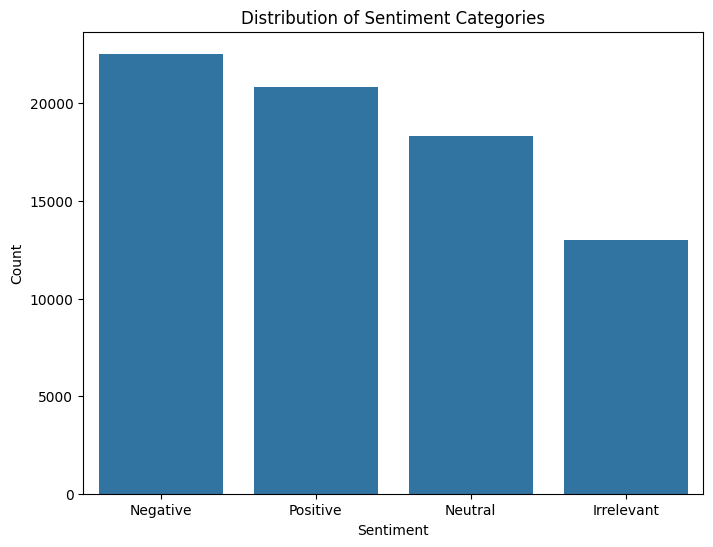

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the count of each sentiment category
sentiment_counts = df['Positive'].value_counts()

# Create a bar plot of sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Data Visualization

### Subtask:
Visualize the most frequent words for each sentiment category.

In [19]:
from collections import Counter

def get_top_n_words(corpus, n=None):
    """
    List the top n words in a corpus.
    """
    words = [word for text in corpus for word in text.split()]
    return Counter(words).most_common(n)

# Get top words for each sentiment
sentiments = df['Positive'].unique()
top_words_by_sentiment = {}

for sentiment in sentiments:
    corpus = df[df['Positive'] == sentiment]['cleaned_text']
    top_words = get_top_n_words(corpus, n=10) # Get top 10 words
    top_words_by_sentiment[sentiment] = top_words

# Display the top words
for sentiment, top_words in top_words_by_sentiment.items():
    print(f"Top 10 words for '{sentiment}' sentiment:")
    for word, count in top_words:
        print(f"- {word}: {count}")
    print("-" * 30)

# Visualize the top words (optional - can be done with word clouds or bar plots)
# For simplicity, we will print them for now.
# If you'd like visualizations like bar plots for each sentiment's top words, let me know!

Top 10 words for 'Positive' sentiment:
- game: 3115
- love: 1801
- im: 1769
- good: 1617
- like: 1371
- really: 1290
- new: 1199
- time: 1141
- play: 1119
- best: 1112
------------------------------
Top 10 words for 'Neutral' sentiment:
- johnson: 1814
- game: 1617
- amazon: 1154
- get: 1011
- like: 946
- u: 921
- im: 891
- one: 879
- google: 855
- play: 850
------------------------------
Top 10 words for 'Negative' sentiment:
- game: 4506
- get: 1829
- like: 1629
- shit: 1530
- im: 1425
- fix: 1325
- fuck: 1291
- play: 1241
- cant: 1229
- dont: 1127
------------------------------
Top 10 words for 'Irrelevant' sentiment:
- player: 1132
- game: 1115
- like: 1015
- see: 949
- im: 856
- people: 773
- ban: 751
- one: 710
- love: 701
- good: 664
------------------------------


## Data Visualization

### Subtask:
Visualize the top 10 most frequent words for each sentiment category using bar plots.

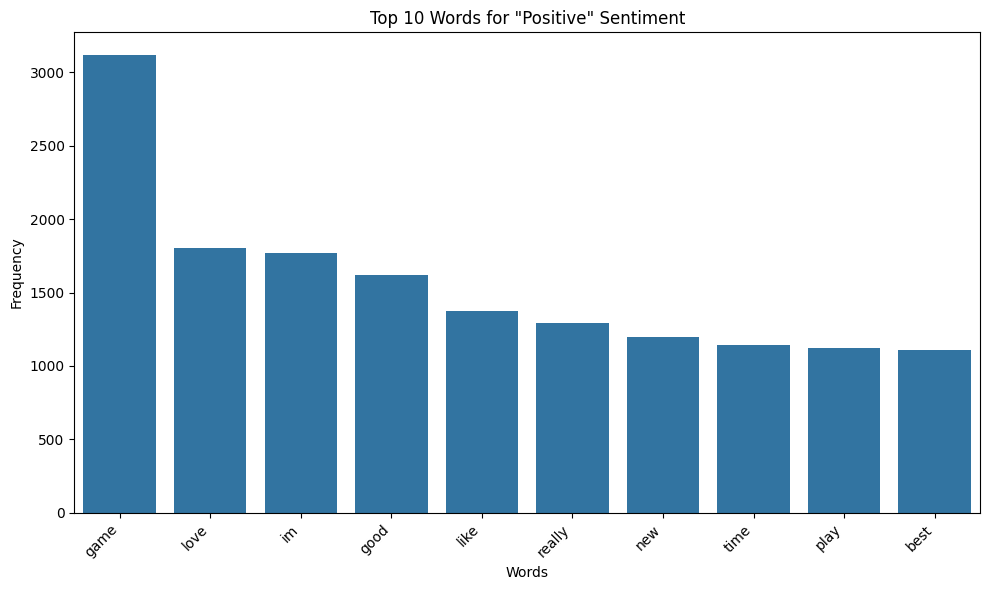

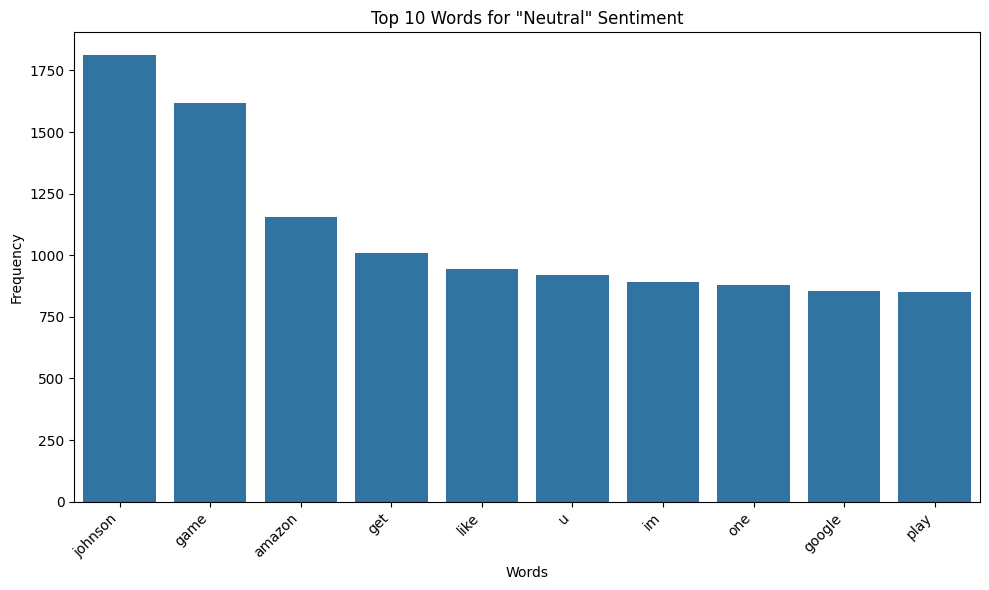

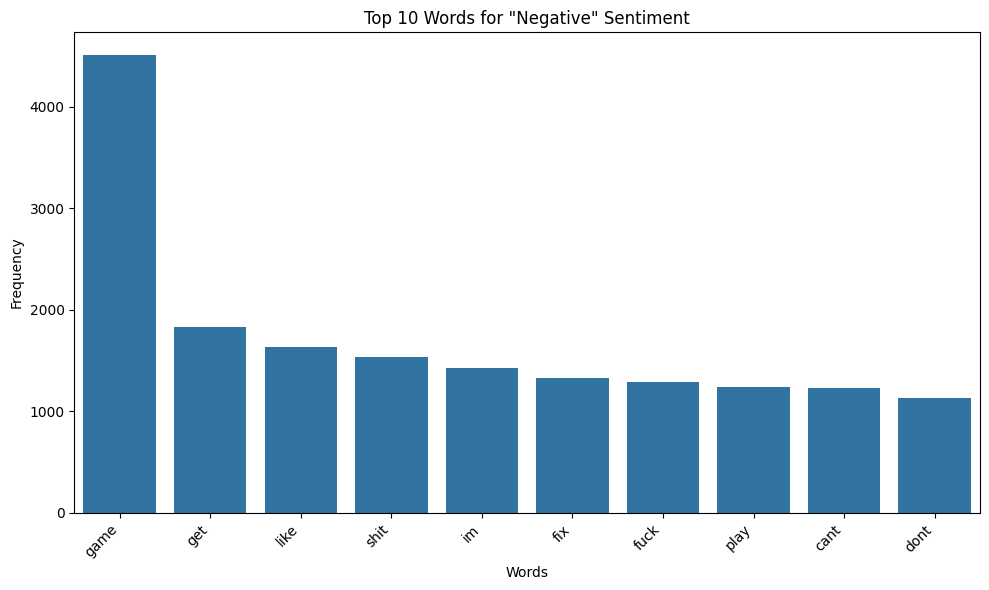

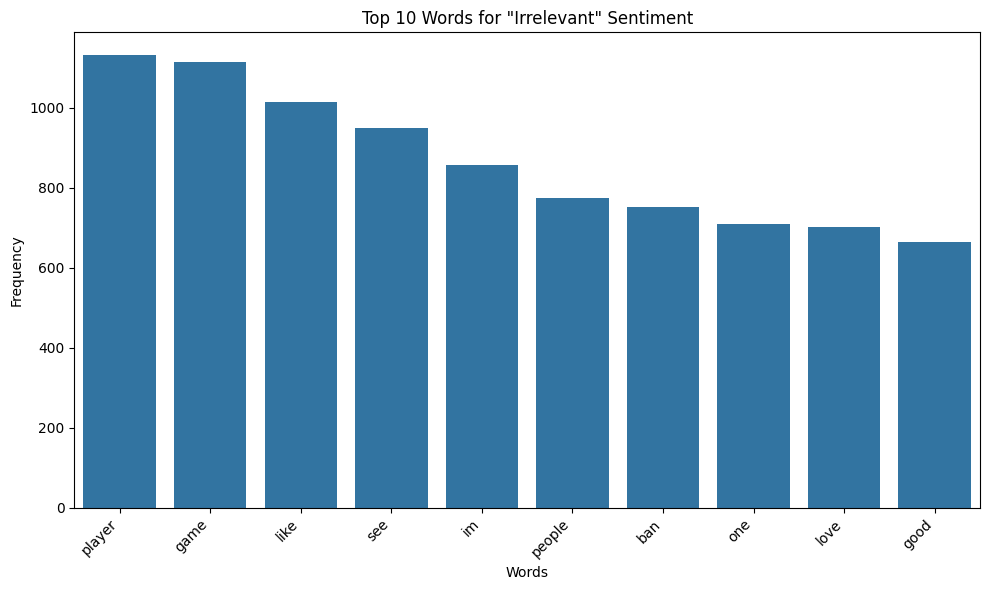

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def get_top_n_words(corpus, n=None):
    """
    List the top n words in a corpus.
    """
    words = [word for text in corpus for word in text.split()]
    return Counter(words).most_common(n)

# Get top words for each sentiment
sentiments = df['Positive'].unique()
top_words_by_sentiment = {}

for sentiment in sentiments:
    corpus = df[df['Positive'] == sentiment]['cleaned_text']
    top_words = get_top_n_words(corpus, n=10) # Get top 10 words
    top_words_by_sentiment[sentiment] = top_words

# Visualize the top words for each sentiment using bar plots
for sentiment, top_words in top_words_by_sentiment.items():
    if top_words: # Check if the list is not empty
        words, counts = zip(*top_words)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(words), y=list(counts))
        plt.title(f'Top 10 Words for "{sentiment}" Sentiment')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Twitter Sentiment Analysis

## Project Overview

This project performs sentiment analysis on a dataset of tweets to classify them into different sentiment categories (Positive, Negative, Neutral, Irrelevant).

## Dataset

The dataset used for this analysis is sourced from Kaggle: [Twitter Entity Sentiment Analysis](https://www.kaggle.com/jp797498e/twitter-entity-sentiment-analysis). Specifically, the `twitter_training.csv` file was used.

## Methodology

1.  **Data Loading**: The `twitter_training.csv` dataset was loaded into a pandas DataFrame.
2.  **Data Preprocessing**: The tweet text data was preprocessed to remove URLs, special characters, and numbers. The text was then lowercased, tokenized, and lemmatized, with stop words removed.
3.  **Model Training**: A Logistic Regression model was trained on the preprocessed text data using TF-IDF vectorization. The data was split into training and testing sets to evaluate the model's performance.
4.  **Model Evaluation**: The trained model was evaluated using accuracy and a classification report to assess its performance across different sentiment categories.
5.  **Sentiment Prediction**: The trained model was used to predict sentiment on sample text data.
6.  **Data Visualization**: Visualizations were created to understand the distribution of sentiment categories and the most frequent words associated with each sentiment.

## Results

-   The Logistic Regression model achieved an accuracy of approximately [Insert Accuracy Score from Model Evaluation Output] on the test set.
-   The classification report provides detailed precision, recall, and f1-score for each sentiment class.
-   Visualizations show the overall distribution of sentiments and the prominent words in each category, offering insights into the language used in tweets with different sentiments.

## Files

-   `twitter_training.csv`: The dataset used for training and analysis.
-   This notebook: Contains the code for data loading, preprocessing, model training, evaluation, prediction, and visualization.

## How to Run

1.  Open the notebook in Google Colab.
2.  Ensure the dataset is accessible in the Colab environment (e.g., mounted from Google Drive or through Kaggle integration).
3.  Run the cells sequentially to execute the sentiment analysis pipeline.